<a href="https://colab.research.google.com/github/vivek-bombatkar/MyLearningNotes/blob/master/ML/TF2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O /tmp/cats_and_dogs_filtered.zip

--2021-03-13 06:17:07--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 64.233.188.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   186MB/s    in 0.4s    

2021-03-13 06:17:08 (186 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os, zipfile

In [ ]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')

In [ ]:
!ls -lrt /tmp/cats_and_dogs_filtered

total 12
-rw-r--r-- 1 root root  140 Mar 13 06:18 vectorize.py
drwxr-xr-x 4 root root 4096 Mar 13 06:18 validation
drwxr-xr-x 4 root root 4096 Mar 13 06:18 train


In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

train_cat_dir = os.path.join(base_dir,'train/cats')
train_dog_dir = os.path.join(base_dir,'train/dogs')

validation_cat_dir = os.path.join(base_dir,'validation/cats')
validation_dog_dir = os.path.join(base_dir, 'validation/dogs')

In [ ]:
train_cat_file_names = os.listdir(train_cat_dir)
train_foc_file_names = os.listdir(train_dog_dir)

In [ ]:
print(f'train cat and dogs {len(os.listdir(train_cat_dir))} & {len(os.listdir(train_dog_dir))}')
print(f'validation cat and dogs {len(os.listdir(validation_cat_dir))} & {len(os.listdir(validation_dog_dir))}')


train cat and dogs 1000 & 1000
validation cat and dogs 500 & 500


In [ ]:
import tensorflow as tf 
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

1. model build

In [ ]:
dog_cat_model = models.Sequential(
    [
     layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
     layers.MaxPool2D(2,2),
     layers.Conv2D(32,(3,3),activation='relu'),
     layers.MaxPool2D(2,2),
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.MaxPool2D(2,2),
     layers.Flatten(),
     layers.Dense(512,activation='relu'),
     layers.Dense(1,'sigmoid')
    ]
) 

In [ ]:
dog_cat_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

2. compile

In [ ]:
dog_cat_model.compile(
    optimizer = RMSprop(learning_rate=0.0001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']

)

*. data preprocessing 

In [ ]:
# 1. datagen
train_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_datagen = ImageDataGenerator(rescale=1.0/255.)

# 2. gnegerator
train_data_generator = train_datagen.flow_from_directory(train_dir,
                                                         batch_size=20,
                                                         class_mode='binary',
                                                         target_size=(150,150)) 

validation_data_generator = test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode='binary',
                                                       target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


3. model fit

In [ ]:
dog_cat_model_prediction = dog_cat_model.fit(
    train_data_generator,
    validation_data=validation_data_generator,
    steps_per_epoch=100,
    epochs=5,
    validation_steps=50,
    verbose=2
)

Epoch 1/5
100/100 - 58s - loss: 0.6881 - accuracy: 0.5410 - val_loss: 0.6540 - val_accuracy: 0.5710
Epoch 2/5
100/100 - 56s - loss: 0.6360 - accuracy: 0.6335 - val_loss: 0.6295 - val_accuracy: 0.6070
Epoch 3/5
100/100 - 56s - loss: 0.5921 - accuracy: 0.6940 - val_loss: 0.5872 - val_accuracy: 0.6980
Epoch 4/5
100/100 - 56s - loss: 0.5537 - accuracy: 0.7215 - val_loss: 0.5761 - val_accuracy: 0.7060
Epoch 5/5
100/100 - 56s - loss: 0.5120 - accuracy: 0.7540 - val_loss: 0.5603 - val_accuracy: 0.7280


In [ ]:

import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = dog_cat_model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")

Saving 20210301_131849.jpg to 20210301_131849 (1).jpg
[2.2944702e-22]
20210301_131849.jpg is a dog


Saving 20210301_131849.jpg to 20210301_131849 (5).jpg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide


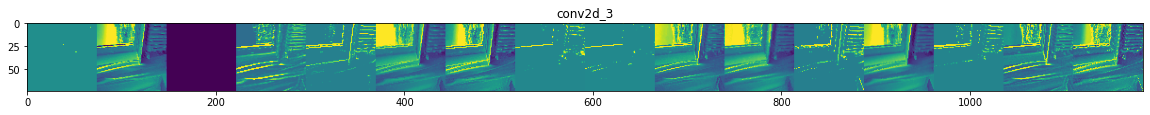

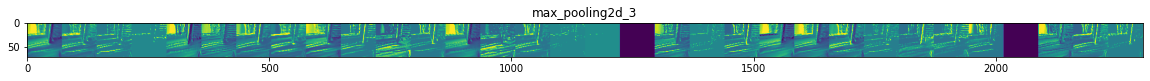

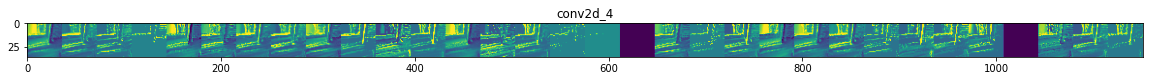

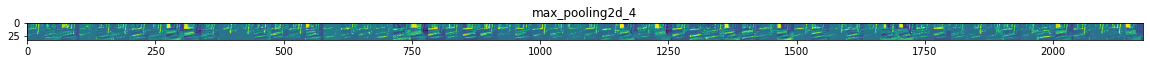

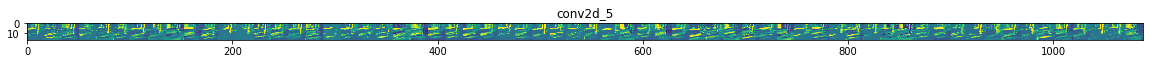

In [ ]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in dog_cat_model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = dog_cat_model.input, outputs = successive_outputs)

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

# # Let's prepare a random input image of a cat or dog from the training set.
# cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_file_names]
# dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_foc_file_names]

# img_path = random.choice(cat_img_files + dog_img_files)
# img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

  x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
  x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

  # Rescale by 1/255
  x /= 255.0

  # Let's run our image through our network, thus obtaining all
  # intermediate representations for this image.
  successive_feature_maps = visualization_model.predict(x)

  # These are the names of the layers, so can have them as part of our plot
  layer_names = [layer.name for layer in dog_cat_model.layers]

  # -----------------------------------------------------------------------
  # Now let's display our representations
  # -----------------------------------------------------------------------
  for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    
    if len(feature_map.shape) == 4:
      
      #-------------------------------------------
      # Just do this for the conv / maxpool layers, not the fully-connected layers
      #-------------------------------------------
      n_features = feature_map.shape[-1]  # number of features in the feature map
      size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
      
      # We will tile our images in this matrix
      display_grid = np.zeros((size, size * n_features))
      
      #-------------------------------------------------
      # Postprocess the feature to be visually palatable
      #-------------------------------------------------
      for i in range(n_features):
        x  = feature_map[0, :, :, i]
        x -= x.mean()
        x /= x.std ()
        x *=  64
        x += 128
        x  = np.clip(x, 0, 255).astype('uint8')
        display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

      #-----------------
      # Display the grid
      #-----------------

      scale = 20. / n_features
      plt.figure( figsize=(scale * n_features, scale) )
      plt.title ( layer_name )
      plt.grid  ( False )
      plt.imshow( display_grid, aspect='auto', cmap='viridis' )
3

# Rock Papper Scissors

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip -O /tmp/rps.zip

--2021-03-13 17:55:22--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.128, 173.194.213.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   116MB/s    in 1.6s    

2021-03-13 17:55:24 (116 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]



In [ ]:
# !rm -f /tmp/rps
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip -O /tmp/rps-test-set.zip

--2021-03-13 17:55:27--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.214.128, 173.194.215.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/rps-test-set.z 100%[===================>]  28.15M  49.2MB/s    in 0.6s    

2021-03-13 17:55:28 (49.2 MB/s) - ‘/tmp/rps-test-set.zip’ saved [29516758/29516758]



In [ ]:
import os, zipfile

zip_ref = zipfile.ZipFile('/tmp/rps.zip','r')
zip_ref.extractall('/tmp/')

In [ ]:
zip_ref = zipfile.ZipFile('/tmp/rps-test-set.zip','r')
zip_ref.extractall('/tmp/')

In [ ]:
!ls -lrt /tmp

total 224832
-rw-r--r-- 1 root root  29516758 Feb 11  2019 rps-test-set.zip
-rw-r--r-- 1 root root 200682221 Feb 11  2019 rps.zip
lrwxrwxrwx 1 root root        61 Mar 13 17:54 dap_multiplexer.INFO -> dap_multiplexer.5d1f5fcf250b.root.log.INFO.20210313-175405.48
srwxr-xr-x 1 root root         0 Mar 13 17:54 debugger_y0lf17s5y
drwx------ 2 root root      4096 Mar 13 17:54 initgoogle_syslog_dir.0
-rw-r--r-- 1 root root      1497 Mar 13 17:54 dap_multiplexer.5d1f5fcf250b.root.log.INFO.20210313-175405.48
drwxr-xr-x 5 root root      4096 Mar 13 17:55 rps
drwxr-xr-x 5 root root      4096 Mar 13 17:55 rps-test-set


In [ ]:
rock_files = os.listdir(os.path.join('/tmp/rps/paper'))
paper_files = os.listdir(os.path.join('/tmp/rps/rock'))
scissor_files = os.listdir(os.path.join('/tmp/rps/scissors'))

In [ ]:
print(f'total images: {len(rock_files)}, {len(paper_files)}, {len(scissor_files)}')

total images: 840, 840, 840


1 .model build

In [ ]:
rps_model = tf.keras.models.Sequential(
    [
     layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
     layers.MaxPool2D(2,2),
     layers.Conv2D(32,(3,3),activation='relu'),
     layers.MaxPool2D(2,2),
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.MaxPool2D(2,2),
     layers.Flatten(),
     layers.Dense(512,'relu'),
     layers.Dense(3,'sigmoid')
    ]
)

2. compile

In [ ]:
rps_model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

*. data prep

In [ ]:
train_dir = '/tmp/rps/'
validation_dir = '/tmp/rps-test-set/'

train_data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)
validation_data_gen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    class_mode='categorical'
)
validation_generator = validation_data_gen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    class_mode='categorical'
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


3. model fit

In [ ]:
rps_model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
    verbose=1
)

Epoch 1/25
79/79 [==============================] - 73s 913ms/step - loss: 2.6969 - accuracy: 0.4039 - val_loss: 0.9278 - val_accuracy: 0.4543
Epoch 2/25
79/79 [==============================] - 72s 904ms/step - loss: 0.8022 - accuracy: 0.6341 - val_loss: 0.5348 - val_accuracy: 0.6962
Epoch 3/25
79/79 [==============================] - 72s 904ms/step - loss: 0.5760 - accuracy: 0.7593 - val_loss: 0.3386 - val_accuracy: 0.8468
Epoch 4/25
79/79 [==============================] - 72s 903ms/step - loss: 0.4275 - accuracy: 0.8648 - val_loss: 0.2269 - val_accuracy: 0.9005
Epoch 5/25
79/79 [==============================] - 71s 899ms/step - loss: 0.3449 - accuracy: 0.8695 - val_loss: 0.1629 - val_accuracy: 0.9409
Epoch 6/25
79/79 [==============================] - 72s 902ms/step - loss: 0.2386 - accuracy: 0.9203 - val_loss: 0.2155 - val_accuracy: 0.9301
Epoch 7/25
79/79 [==============================] - 72s 902ms/step - loss: 0.1967 - accuracy: 0.9330 - val_loss: 0.1997 - val_accuracy: 0.9274

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)